#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## EDA


In [7]:
df.shape

(1338, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

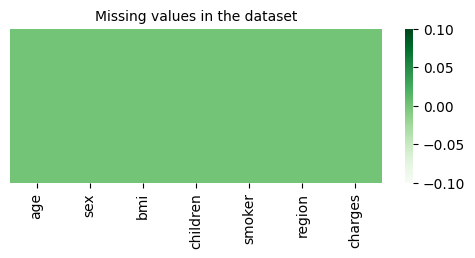

In [11]:
plt.figure(figsize=(6,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Greens')
plt.title('Missing values in the dataset', fontsize=10);

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
df.describe(exclude=[np.number])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [14]:
# Checking number of unique values in each column
df.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [16]:
# Separating Numerical and Categorical columns

# Checking for categorical and Numerical columns
cat_col = []
num_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        cat_col.append(i)
    else:
        num_col.append(i)
print(f"Categorical Columns: {cat_col}")
print(f"Numerical Columns: {num_col}")

Categorical Columns: ['sex', 'smoker', 'region']
Numerical Columns: ['age', 'bmi', 'children', 'charges']


## Data Visualization


sex
male      676
female    662
Name: count, dtype: int64

smoker
no     1064
yes     274
Name: count, dtype: int64

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

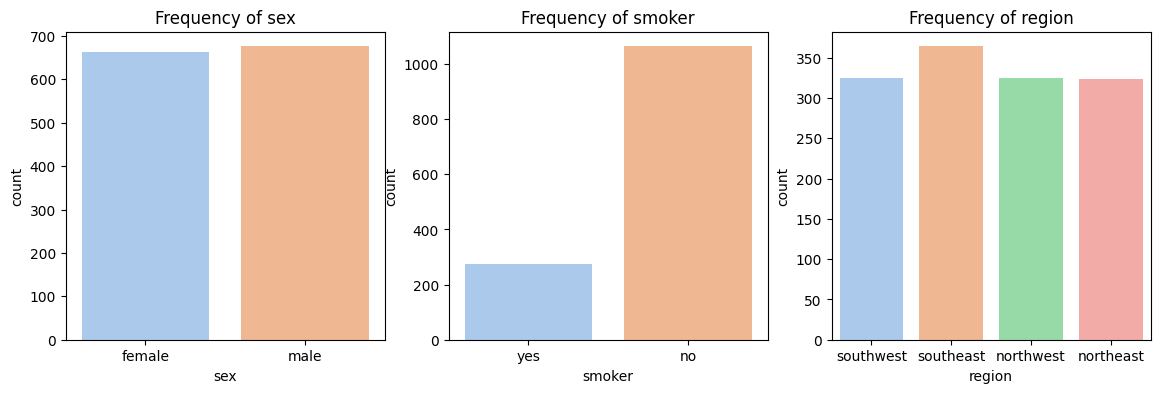

In [17]:
# Checking the value counts of the categorical independent variables)
for col in cat_col:
    display(df[col].value_counts())

# Visualize the categorical variables
fig, axs = plt.subplots(1, 3, figsize=(14, 4))

for ax, column in zip(axs.flat, cat_col):
    sns.countplot(data=df, x=column, ax=ax, palette='pastel')
    ax.set_title(f"Frequency of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

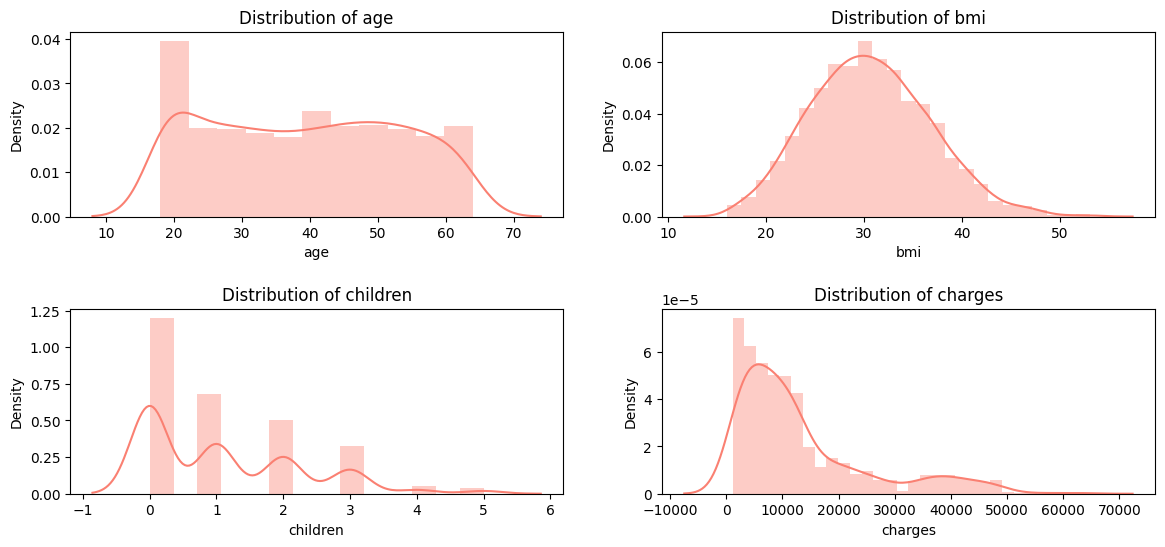

In [19]:
# distribution of the numerical columns

fig, axs = plt.subplots(2, 2, figsize=(14, 6))
for ax, column in zip(axs.flat, num_col):
    sns.distplot( df[column], ax=ax,  color='salmon')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

In [26]:
num_skewness = df[num_col].skew()
num_skewness

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [34]:
df['charges_cub']= np.cbrt(df['charges'])

In [32]:
# Apply Log transformation to the target variable
df['charges_log'] = np.log(df['charges'])
display(df.head())


,age,sex,bmi,children,smoker,region,charges,charges_cub,charges_log
0,19,female,27.900,0,yes,southwest,16884.92400,25.654666,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,11.994331,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,16.447599,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,28.013799,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,15.695891,8.260197


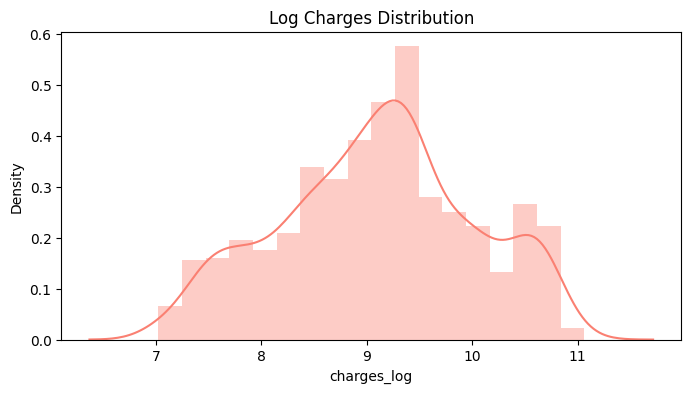

In [30]:
# Visualizing the Log Charges distribution
plt.figure(figsize=(8,4))
sns.distplot( df['charges_log'],  color='salmon')
plt.title(f"Log Charges Distribution")
plt.show()

### Bivariate Analysis


In [38]:
# Categories:  Young Adult (18-30), Middle Adult(31-55), Older Adult(55+)
age_categories = ['Young adult(18-30)','Middle adult(31-55)','Older adults(55+)']
conditions =[
    (df['age'] <= 30),
    ((df['age'] > 30) & (df['age'] <= 55)),
    (df['age'] > 55)
]
df['age_grp'] = np.select(conditions,age_categories, default="Other")

# Converting to ordered category
df['age_grp'] = df['age_grp'].astype('category')
df['age_grp'] = df['age_grp'].cat.reorder_categories(
    new_categories=['Young adult(18-30)','Middle adult(31-55)','Older adults(55+)'],
    ordered=True)


In [39]:
df.sample(1)

,age,sex,bmi,children,smoker,region,charges,charges_cub,charges_log,bmi_grp,age_grp
684,33,female,18.5,1,no,southwest,4766.022,16.828756,8.469267,Underweight,Middle adult(31-55)


In [40]:
grp_by_age = df.groupby(['age_grp']).agg({'age':'count', 'bmi':'mean','charges':'mean'})
grp_by_age

,age,bmi,charges
age_grp,,,
Young adult(18-30),444,29.890766,9397.552051
Middle adult(31-55),678,30.826593,14046.279079
Older adults(55+),216,31.739329,18795.993816


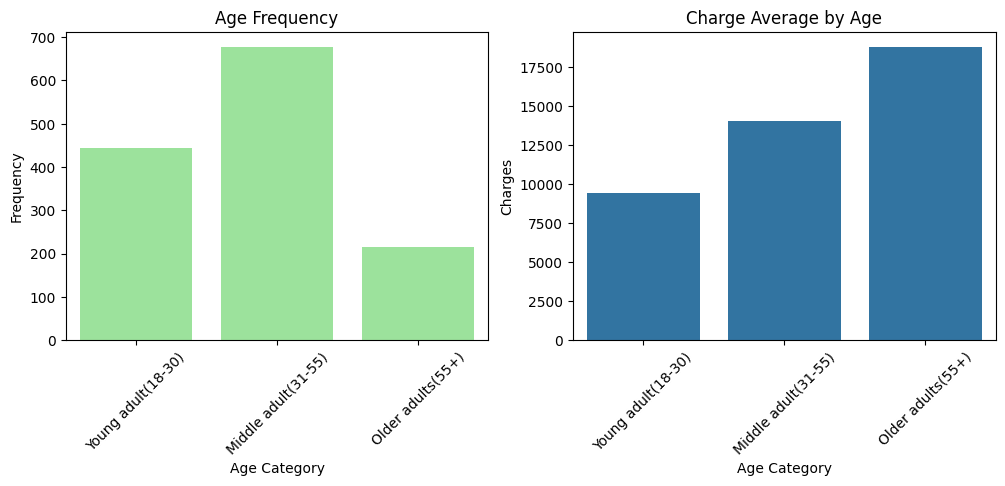

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.set_palette('pastel')

# Visualizing the Frequency by age group
sns.countplot(data=df,  x='age_grp', color='lightgreen', ax=axes[0])
# Visualizing the charge mean by age group
sns.barplot(data=grp_by_age,x=grp_by_age.index,  y='charges',ax=axes[1])

# Rotate x-axis labels on both charts
axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)

axes[0].set_xlabel('Age Category')  # change xlabel
axes[1].set_xlabel('Age Category')  # change xlabel


axes[0].set_ylabel('Frequency')   # change ylabel
axes[1].set_ylabel('Charges')     # change ylabel

axes[0].set_title('Age Frequency')
axes[1].set_title('Charge Average by Age')

# plt.title(f"Frequency of Quality")
plt.show()

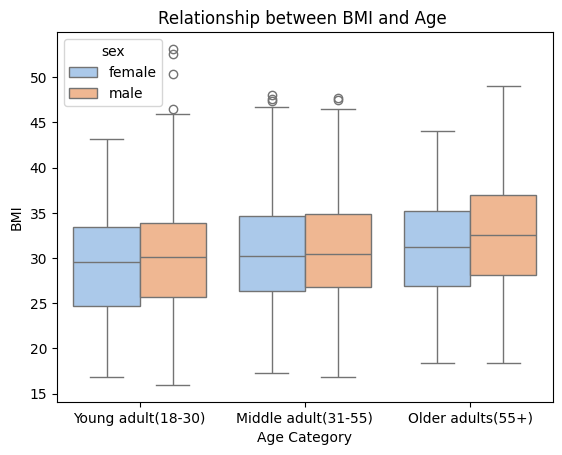

In [42]:
sns.boxplot(data=df, x='age_grp', y='bmi', hue='sex', showfliers=True)
plt.ylabel("BMI")
plt.xlabel("Age Category")
plt.title("Relationship between BMI and Age ")

plt.show()

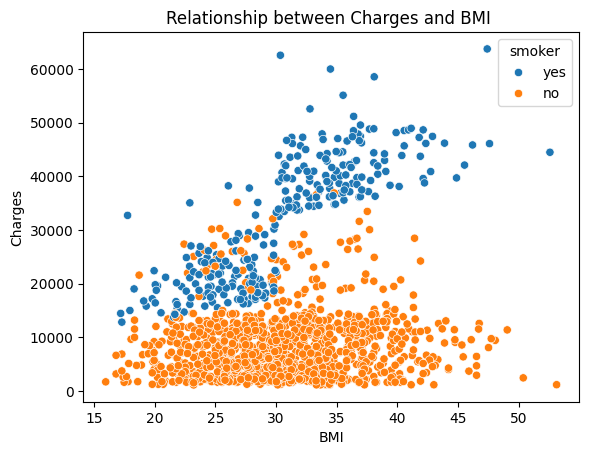

In [35]:
sns.scatterplot(data=df,  x='bmi', y='charges', hue='smoker' )

plt.ylabel("Charges")
plt.xlabel("BMI")
plt.title("Relationship between Charges and BMI ")
plt.show()

##### BMI Categories

- **Underweight:** BMI is less than 18.5
- **Normal weight:** BMI is 18.5 to 24.9
- **Overweight:** BMI is 25 to 29.9
- **Obese:** BMI is 30 or more

In [44]:
# Categories
bmi_categories = ['Underweight','Normal weight','Overweight', 'Obese']
conditions_bmi =[
    (df['bmi'] <= 18.5),
    ((df['bmi'] > 18.5) & (df['bmi'] < 25)),
    ((df['bmi'] >= 25) & (df['bmi'] < 30)),
    (df['bmi'] >= 30)
]
df['bmi_grp'] = np.select(conditions_bmi, bmi_categories, default="Other")

# Converting to ordered category
df['bmi_grp'] = df['bmi_grp'].astype('category')
df['bmi_grp'].cat.reorder_categories(
    new_categories = ['Underweight','Normal weight','Overweight', 'Obese'],
    ordered = True)

0          Overweight
1               Obese
2               Obese
3       Normal weight
4          Overweight
            ...      
1333            Obese
1334            Obese
1335            Obese
1336       Overweight
1337       Overweight
Name: bmi_grp, Length: 1338, dtype: category
Categories (4, object): ['Underweight' < 'Normal weight' < 'Overweight' < 'Obese']

In [45]:
df.sample(3)

,age,sex,bmi,children,smoker,region,charges,charges_cub,charges_log,bmi_grp,age_grp
148,53,female,37.430,1,no,northwest,10959.69470,22.212605,9.301980,Obese,Middle adult(31-55)
990,26,female,19.800,1,no,southwest,3378.91000,15.005790,8.125308,Normal weight,Young adult(18-30)
1165,35,female,26.125,0,no,northeast,5227.98875,17.355810,8.561782,Overweight,Middle adult(31-55)


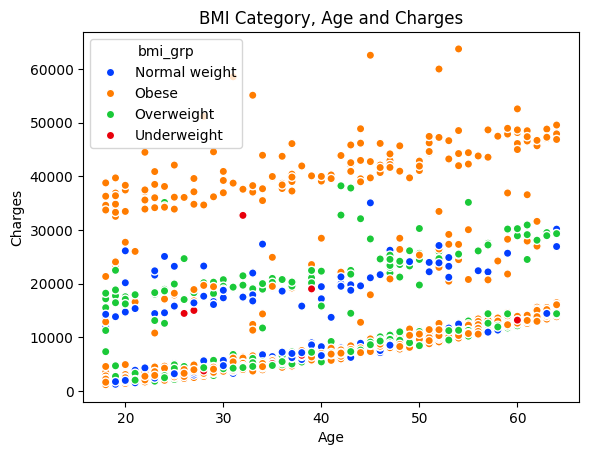

In [46]:
sns.scatterplot(x="age", y="charges", hue="bmi_grp", data=df, linewidth=1, palette='bright')
plt.ylabel("Charges")
plt.xlabel("Age")
plt.title("BMI Category, Age and Charges")
plt.show()

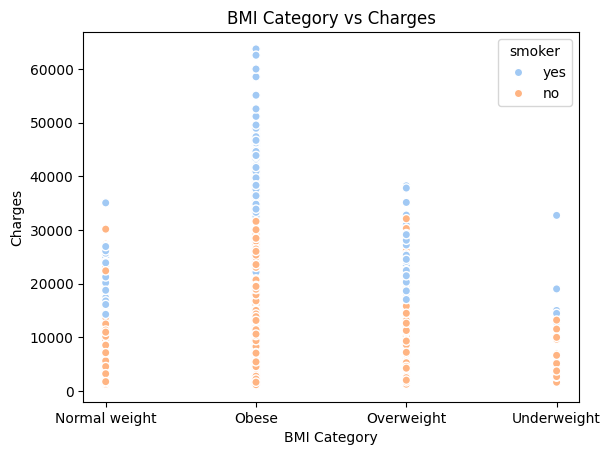

In [47]:
sns.scatterplot(x="bmi_grp", y="charges", hue="smoker", data=df, linewidth=1, palette='pastel')
plt.ylabel("Charges")
plt.xlabel("BMI Category")
plt.title("BMI Category vs Charges")
plt.show()

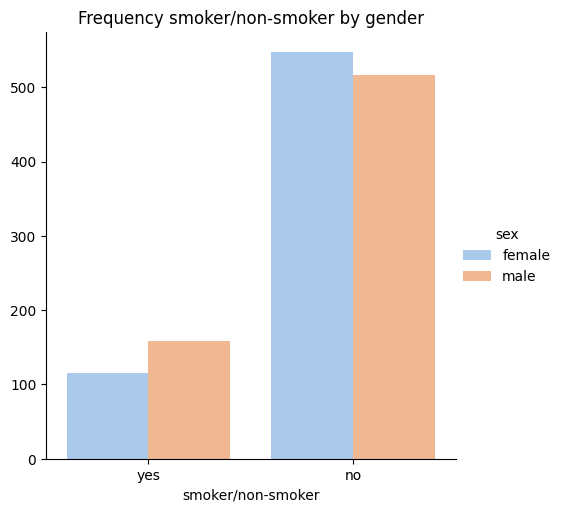

In [48]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pastel", data=df)
plt.ylabel("")
plt.xlabel("smoker/non-smoker")
plt.title("Frequency smoker/non-smoker by gender")
plt.show()

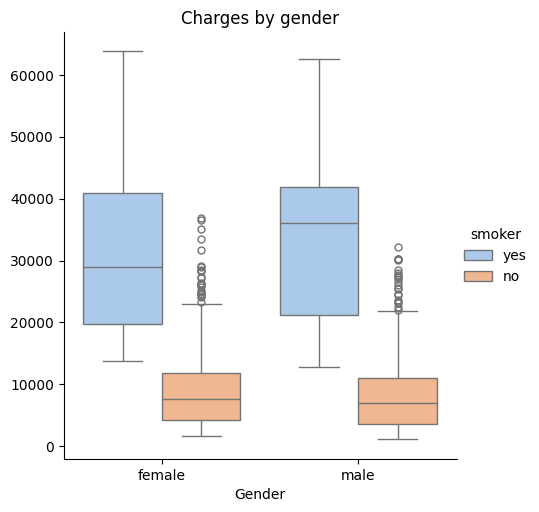

In [49]:
sns.catplot(x="sex", y="charges", hue="smoker", kind="box", data=df, palette = 'pastel')
plt.ylabel("")
plt.xlabel("Gender")
plt.title("Charges by gender")
plt.show()

### Multivariate Analysis

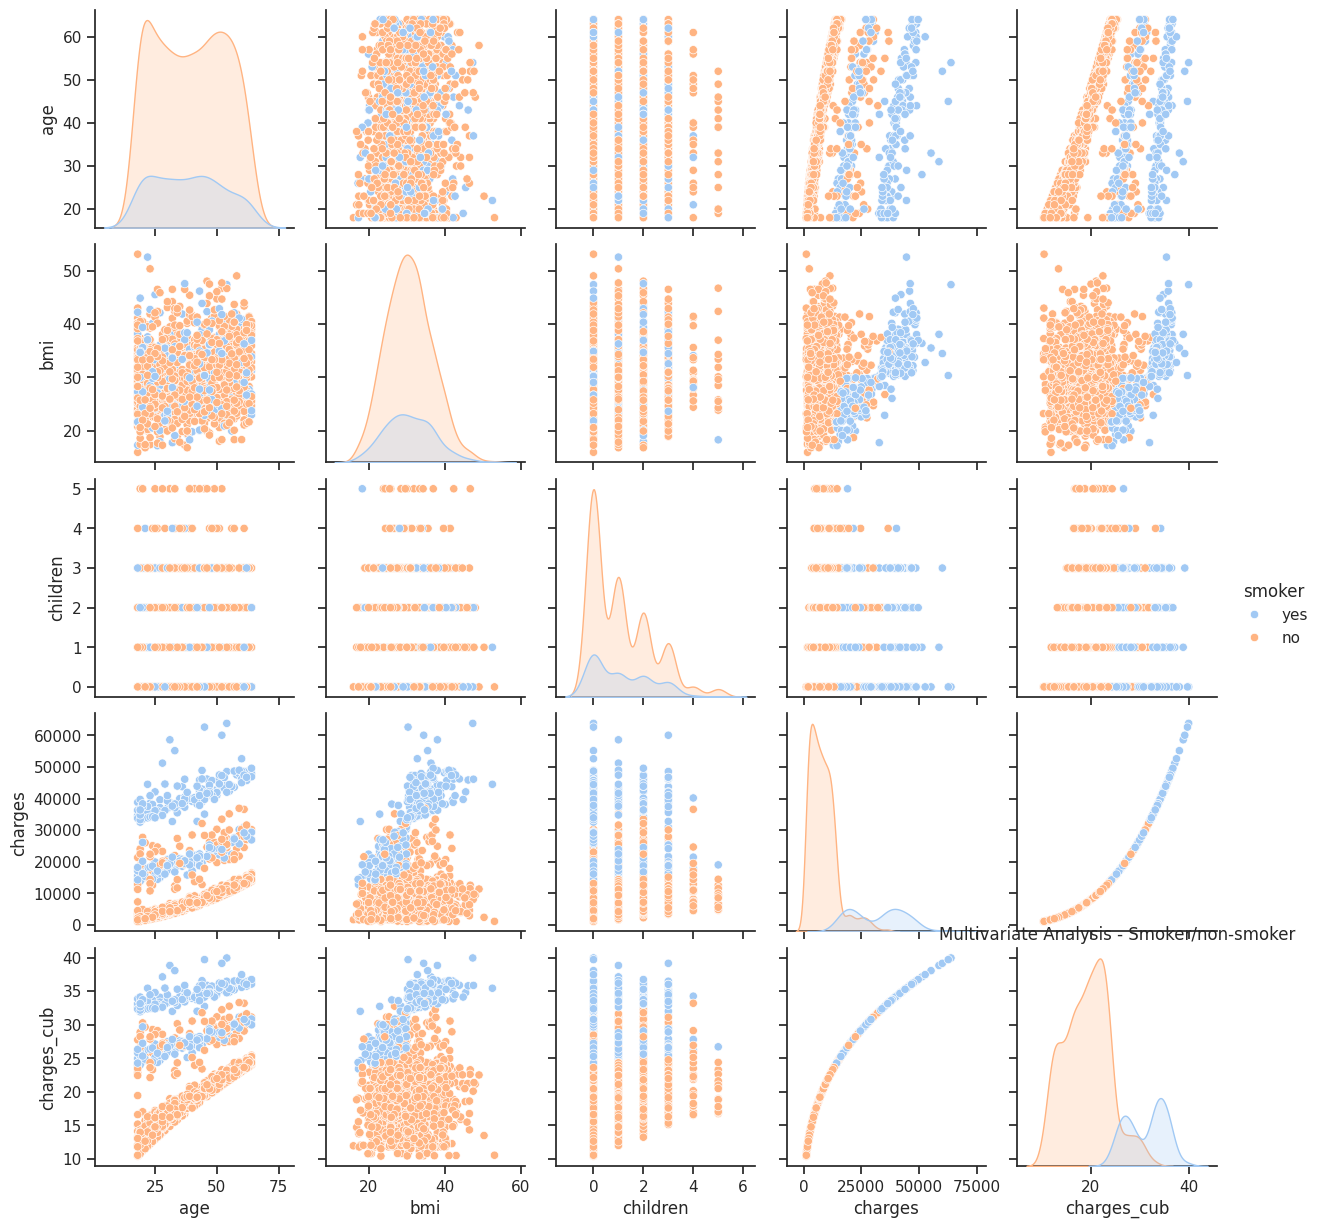

In [50]:
sns.set(style="ticks")
sns.pairplot(df.drop('charges_log', axis=1), hue="smoker", palette='pastel')

plt.title("Multivariate Analysis - Smoker/non-smoker")
plt.show()


In [51]:
# Encoding columns Sex and Smoker
encoding_dict = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1}
                 }

df_encoded = df.drop(['age_grp'], axis = 1 )
df_encoded.replace(encoding_dict, inplace=True)

# One-Hot Encoding - column region
df_encoded = pd.get_dummies(df_encoded, columns=['region'], prefix=['r'])

# Arranging the columns
df_encoded = df_encoded[['age', 'sex', 'bmi', 'children', 'smoker',
       'r_northeast', 'r_northwest', 'r_southeast', 'r_southwest', 'charges', 'charges_log']]

# Presenting the dataframe
df_encoded.head()


,age,sex,bmi,children,smoker,r_northeast,r_northwest,r_southeast,r_southwest,charges,charges_log
0,19,1,27.900,0,1,False,False,False,True,16884.92400,9.734176
1,18,0,33.770,1,0,False,False,True,False,1725.55230,7.453302
2,28,0,33.000,3,0,False,False,True,False,4449.46200,8.400538
3,33,0,22.705,0,0,False,True,False,False,21984.47061,9.998092
4,32,0,28.880,0,0,False,True,False,False,3866.85520,8.260197


### Removing outliers

In [53]:
from scipy.stats import zscore

# Exclude non-numerical columns before calculating Z-scores
numerical_columns = df_encoded.select_dtypes(include=['number']).columns
z = np.abs(zscore(df_encoded[numerical_columns]))
print(z)


           age       sex       bmi  children    smoker   charges  charges_log
0     1.438764  1.010519  0.453320  0.908614  1.970587  0.298584     0.691394
1     1.509965  0.989591  0.509621  0.078767  0.507463  0.953689     1.790020
2     0.797954  0.989591  0.383307  1.580926  0.507463  0.728675     0.759500
3     0.441948  0.989591  1.305531  0.908614  0.507463  0.719843     0.978513
4     0.513149  0.989591  0.292556  0.908614  0.507463  0.776802     0.912181
...        ...       ...       ...       ...       ...       ...          ...
1333  0.768473  0.989591  0.050297  1.580926  0.507463  0.220551     0.184949
1334  1.509965  1.010519  0.206139  0.908614  0.507463  0.914002     1.522799
1335  1.509965  1.010519  1.014878  0.908614  0.507463  0.961596     1.852106
1336  1.296362  1.010519  0.797813  0.908614  0.507463  0.930362     1.625129
1337  1.551686  1.010519  0.261388  0.908614  1.970587  1.311053     1.285113

[1338 rows x 7 columns]


In [54]:
df_new = df_encoded[(z.iloc[:,:9]<3).all(axis=1)]

print(f"{df_encoded.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df_encoded.shape[0] - df_new.shape[0]) / df_encoded.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df_encoded.shape[1]} columns.")
df_encoded = df_new
df_encoded

29 rows with outliers were deleted.
This represent 2.17% of the data.
In the new dataset there are 1309 rows and 11 columns.


,age,sex,bmi,children,smoker,r_northeast,r_northwest,r_southeast,r_southwest,charges,charges_log
0,19,1,27.900,0,1,False,False,False,True,16884.92400,9.734176
1,18,0,33.770,1,0,False,False,True,False,1725.55230,7.453302
2,28,0,33.000,3,0,False,False,True,False,4449.46200,8.400538
3,33,0,22.705,0,0,False,True,False,False,21984.47061,9.998092
4,32,0,28.880,0,0,False,True,False,False,3866.85520,8.260197
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,False,True,False,False,10600.54830,9.268661
1334,18,1,31.920,0,0,True,False,False,False,2205.98080,7.698927
1335,18,1,36.850,0,0,False,False,True,False,1629.83350,7.396233
1336,21,1,25.800,0,0,False,False,False,True,2007.94500,7.604867


In [55]:
# Checking the correlation between features and the target.
cor = df_encoded.drop(['charges_log'], axis = 1).corr()
cor

,age,sex,bmi,children,smoker,r_northeast,r_northwest,r_southeast,r_southwest,charges
age,1.000000,0.019253,0.118178,0.059100,-0.029090,0.004564,-0.003449,-0.014346,0.013766,0.305263
sex,0.019253,1.000000,-0.042498,-0.014056,-0.079058,0.003042,0.006602,-0.013987,0.004798,-0.059455
bmi,0.118178,-0.042498,1.000000,0.029916,-0.005288,-0.137201,-0.134342,0.261014,0.002552,0.191453
children,0.059100,-0.014056,0.029916,1.000000,0.028844,-0.018062,0.044948,-0.027381,0.001275,0.100438
smoker,-0.029090,-0.079058,-0.005288,0.028844,1.000000,0.005387,-0.040557,0.071776,-0.039005,0.785129
r_northeast,0.004564,0.003042,-0.137201,-0.018062,0.005387,1.000000,-0.324897,-0.344979,-0.320213,0.011435
r_northwest,-0.003449,0.006602,-0.134342,0.044948,-0.040557,-0.324897,1.000000,-0.346405,-0.321537,-0.045847
r_southeast,-0.014346,-0.013987,0.261014,-0.027381,0.071776,-0.344979,-0.346405,1.000000,-0.341411,0.074829
r_southwest,0.013766,0.004798,0.002552,0.001275,-0.039005,-0.320213,-0.321537,-0.341411,1.000000,-0.042922
charges,0.305263,-0.059455,0.191453,0.100438,0.785129,0.011435,-0.045847,0.074829,-0.042922,1.000000


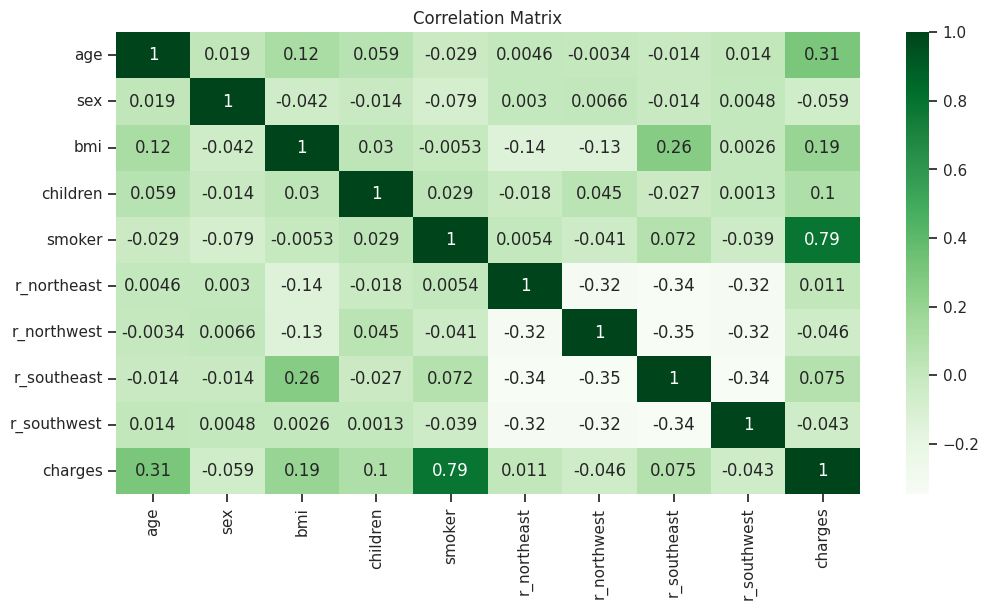

In [56]:
# Visualizing the Correlation Matrix
plt.figure(figsize=(12,6))
sns.heatmap(cor, cmap='Greens', annot=True)
plt.title('Correlation Matrix');

In [57]:
cor['charges'].sort_values(ascending = False).to_frame()

,charges
charges,1.000000
smoker,0.785129
age,0.305263
bmi,0.191453
children,0.100438
r_southeast,0.074829
r_northeast,0.011435
r_southwest,-0.042922
r_northwest,-0.045847
sex,-0.059455


In [58]:
# Droping the columns with less correlation with target variable
df_encoded.drop(['children', 'sex','r_southeast', 'r_northeast', 'r_southwest', 'r_northwest'], axis=1, inplace=True)

In [59]:
df_encoded.head()

,age,bmi,smoker,charges,charges_log
0,19,27.900,1,16884.92400,9.734176
1,18,33.770,0,1725.55230,7.453302
2,28,33.000,0,4449.46200,8.400538
3,33,22.705,0,21984.47061,9.998092
4,32,28.880,0,3866.85520,8.260197


### Review the skewness and the data distribution prior to building the model

In [60]:
df_encoded.skew().sort_values(ascending=False)

smoker         1.482731
charges        1.437160
bmi            0.191432
age            0.051340
charges_log   -0.107363
dtype: float64

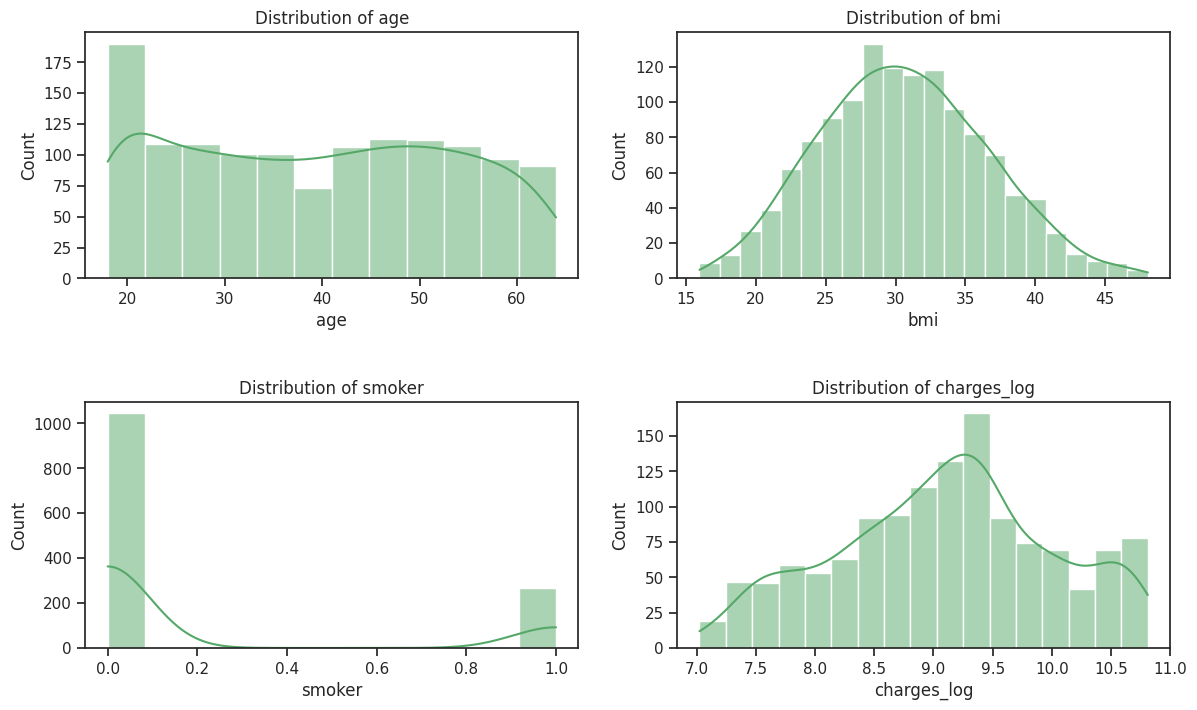

In [61]:
fig, axs = plt.subplots(2, 2, figsize=(14, 8))
for ax, column in zip(axs.flat, df_encoded.drop(['charges'], axis = 1).columns):
    sns.histplot(data=df_encoded, x=column, ax=ax, kde=True, color='g')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

### Separating features and label

In [62]:
x = df_encoded.drop(['charges', 'charges_log'], axis = 1)
y = df_encoded['charges_log']

#### Feature Scaling using Standard Scalarization

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,age,bmi,smoker
0,-1.439063,-0.449359,1.984848
1,-1.510086,0.533391,-0.503817
2,-0.799859,0.404478,-0.503817
3,-0.444746,-1.319101,-0.503817
4,-0.515769,-0.285288,-0.503817
...,...,...,...
1304,0.762639,0.064617,-0.503817
1305,-1.510086,0.223666,-0.503817
1306,-1.510086,1.049041,-0.503817
1307,-1.297018,-0.800939,-0.503817


#### Checking Variance Inflation Factor (VIF)


In [64]:
# Finding variance inflation factor in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
0,age,1.014998
1,bmi,1.014167
2,smoker,1.000850


#### Creating train test split

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=145)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (916, 3)
x_test shape:   (393, 3)
y_train shape:  (916,)
y_test shape:   (393,)


#### Regression algorithms

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [67]:
# Setting a DataFrame to save the evaluation of each model
eval_model = pd.DataFrame(columns=['Model', 'RMSE', 'R2_Score(test)', 'CV_Mean'])

#### Linear Regression

In [69]:
lm = LinearRegression()
lm.fit(x_train, y_train)

print("LR coef_        :", lm.coef_)
print("\nLR intercept_ :", lm.intercept_)
print("LR score train  :", lm.score(x_train, y_train))
print("LR score test   :", lm.score(x_test, y_test))

# Predict the value
y_pred = lm.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(lm, x, y, cv=10, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)
r_mse = np.sqrt(mse)

print("********** E R R O R **********")
print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'Model': lm, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = pd.concat([eval_model, pd.DataFrame(model_scores, index=[0])], ignore_index=True)

LR coef_        : [0.49216726 0.05549593 0.62997654]

LR intercept_ : 9.094435874338808
LR score train  : 0.7534901418360567
LR score test   : 0.7127662321111368
********** E R R O R **********
Mean squared error: 0.2420
Root Mean squared error: 0.4919
Cross-validation results (R2): [0.81449129 0.75916705 0.67331659 0.67425308 0.76121174 0.81974597
 0.82125815 0.65095339 0.64986397 0.7510248 ]
Average R2: 0.7375
R2_Score(test): 0.7128


#### DecisionTreeRegressor

In [75]:
# Create the decision tree regression model
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(x_train, y_train)

# Predict the value
y_pred = dtr.predict(x_test)

# Perform cross-validation and measure performance using R-squared (R2)
scores = cross_val_score(dtr, x, y, cv=5, scoring='r2')
mse = mean_squared_error(y_test, y_pred)
r2_score_val = dtr.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {scores}" )
print(f"Average R2: {scores.mean():.4f}")
print(f"R2_Score(test): {r2_score_val:.4f}")

model_scores = {'Model': dtr, 'RMSE': r_mse, 'R2_Score(test)':r2_score_val, 'CV_Mean': scores.mean() }
eval_model = pd.concat([eval_model, pd.DataFrame(model_scores, index=[0])], ignore_index=True)

Mean squared error: 0.4318
Root Mean squared error: 0.6571
Cross-validation results (R2): [0.61277028 0.49112553 0.59179175 0.61254284 0.54156721]
Average R2: 0.5700
R2_Score(test): 0.4875


#### RandomForest Regressor

In [73]:
%%time
rfr = RandomForestRegressor()
parameters = {'n_estimators': [100, 600, 1000],
              'max_features': ["auto"],
              'max_depth': [None, 40, 50, 60],
              'min_samples_split': [5, 7, 9],
              'min_samples_leaf': [7, 10, 12],
              'criterion': ['squared_error'],  # Change 'mse' to 'squared_error'
              'bootstrap': [True, False]}

grid_cv = GridSearchCV(estimator = rfr, param_grid=parameters, cv=5, n_jobs=-1)
grid_cv.fit(x_train, y_train)

CPU times: user 13.9 s, sys: 2.41 s, total: 16.3 s
Wall time: 17min 28s


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['squared_error'],
                         'max_depth': [None, 40, 50, 60],
                         'max_features': ['auto'],
                         'min_samples_leaf': [7, 10, 12],
                         'min_samples_split': [5, 7, 9],
                         'n_estimators': [100, 600, 1000]})

In [80]:
import pandas as pd

# Initialize eval_model DataFrame with column names
eval_model = pd.DataFrame(columns=['Model', 'RMSE', 'R2_Score(test)', 'CV_Mean'])

# Obtain best parameters, best estimator, and best score from grid search
best_params = grid_cv.best_params_
best_estimator = grid_cv.best_estimator_
best_score = grid_cv.best_score_

print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print("Best Estimator: ", best_estimator)

# Predict the values using the best estimator
y_pred = best_estimator.predict(x_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}")
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")

# Initialize eval_model DataFrame with column names
eval_model_columns = ['Model', 'RMSE', 'R2_Score(test)', 'CV_Mean']
eval_model = pd.DataFrame(columns=eval_model_columns)

# Append model scores to eval_model
model_scores = {'Model': str(best_estimator), 'RMSE': r_mse, 'R2_Score(test)': r2_score_test, 'CV_Mean': best_score}
#eval_model = eval_model.concat(model_scores, ignore_index=True)

eval_model = pd.concat([eval_model, pd.DataFrame(model_scores, index=[0])], ignore_index=True)

Best parameters : {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 12, 'min_samples_split': 7, 'n_estimators': 100}
Best score : 0.8160163928083553
Best Estimator:  RandomForestRegressor(max_depth=50, max_features='auto', min_samples_leaf=12,
                      min_samples_split=7)
Mean squared error: 0.2019
Root Mean squared error: 0.4493
Cross-validation results (R2): 0.8160163928083553
Average R2: 0.8160
R2_Score(test): 0.7603


In [87]:
best_params = grid_cv.best_params_
best_estimator = grid_cv.best_estimator_
best_score = grid_cv.best_score_
print(f"Best parameters : {best_params}")
print(f"Best score : {best_score}")
print ("Best Estimator: ", best_estimator)


# Predict the value
y_pred = best_estimator.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2_score_test = best_estimator.score(x_test, y_test)
r_mse = np.sqrt(mse)

print(f"Mean squared error: {mse:.4f}")
print(f"Root Mean squared error: {r_mse:.4f}")
print(f"Cross-validation results (R2): {best_score}" )
print(f"Average R2: {best_score.mean():.4f}")
print(f"R2_Score(test): {r2_score_test:.4f}")

model_scores = {'Model': best_estimator, 'RMSE': r_mse, 'R2_Score(test)': r2_score_test, 'CV_Mean': best_score }
eval_model = pd.concat([eval_model, pd.DataFrame(model_scores)], ignore_index=True)

Best parameters : {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 12, 'min_samples_split': 7, 'n_estimators': 100}
Best score : 0.8160163928083553
Best Estimator:  RandomForestRegressor(max_depth=50, max_features='auto', min_samples_leaf=12,
                      min_samples_split=7)
Mean squared error: 0.2019
Root Mean squared error: 0.4493
Cross-validation results (R2): 0.8160163928083553
Average R2: 0.8160
R2_Score(test): 0.7603


In [83]:
# Display a comparation
eval_model

,Model,RMSE,R2_Score(test),CV_Mean
0,"RandomForestRegressor(max_depth=50, max_featur...",0.449337,0.760327,0.816016


#### Saving the model

In [84]:
#Save the Best Model
import joblib

joblib.dump(best_estimator, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

In [85]:
# Load the Model for Future Predictions
loaded_model = joblib.load('best_random_forest_model.pkl')
predictions = loaded_model.predict(x_train)
predictions

array([ 8.94932249, 10.00886714,  8.92951876, 10.15024155,  9.74114152,
        9.74920777,  9.41082989,  8.40807193,  9.59112807,  9.23454067,
        7.92899302,  8.40209782,  8.86759163,  8.21851425,  9.41495521,
        9.61735071,  9.25665713, 10.54308739,  8.3845875 ,  9.24223317,
        8.95246195,  8.44820506,  9.49699028,  8.41925672,  8.47770004,
        7.79699895, 10.06831806, 10.01841032,  8.87406968,  9.25209571,
        7.52959781,  9.96956724,  7.67070784,  8.41503126,  9.23945825,
        9.56542762,  9.57400543,  8.40399485,  8.46593547,  9.54082229,
        8.75044706,  9.61186224,  9.03989965, 10.53444289,  8.4959866 ,
        9.36916016,  8.64710949,  9.61601973,  8.42082108,  8.48488526,
        9.0990608 ,  8.35083422,  7.49796756,  8.44775113,  9.56407517,
        9.50471811,  8.20743818,  8.4570484 ,  9.25284875, 10.56805962,
        9.29611601,  9.26646684, 10.01299592,  9.4581322 ,  7.68309167,
        8.41925672,  8.86990999,  9.72960414,  9.25814034, 10.18